In [455]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [456]:
train=pd.read_csv('train.csv')
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [457]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()  
train['Gender']= label_encoder.fit_transform(train['Gender']) 
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [458]:
median_train=train['Albumin_and_Globulin_Ratio'].mean()
train['Albumin_and_Globulin_Ratio']=train['Albumin_and_Globulin_Ratio'].fillna(median_train)
train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [459]:
test=pd.read_csv('test.csv') 
label_encoder = preprocessing.LabelEncoder() 
test['Gender']= label_encoder.fit_transform(test['Gender']) 
median_test=test['Albumin_and_Globulin_Ratio'].median()
test['Albumin_and_Globulin_Ratio']=test['Albumin_and_Globulin_Ratio'].fillna(median_train)
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


# Logistic Regression

In [460]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#X=train.loc[:,['Age', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Alkaline_Phosphotase', 'Aspartate_Aminotransferase', 'Gender', 'Total_Bilirubin']]
X=train.iloc[:,:-2]
y=train['Dataset']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)
#test_size=0.5
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)

C:\Users\Nishant Sirbhai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [461]:
y_predict
#y_train
#X_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [462]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7571428571428571

# Naive Bayes 

In [463]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train , y_train)
y_predict=nb.predict(X_test)

In [464]:
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1], dtype=int64)

In [465]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.45714285714285713

# Stochastic Gradient Descent

In [466]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
sgd.fit(X_train,y_train)
y_predict=sgd.predict(X_test)

C:\Users\Nishant Sirbhai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [467]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [468]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8285714285714286

# KNN

In [469]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
y_predict=kn.predict(X_test)
y_predict

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [470]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7571428571428571

# Decision Tree

In [471]:
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
y_predict=d_tree.predict(X_test)
y_predict

array([1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [472]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.6428571428571429

# Random Forest

In [473]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict=rf.predict(X_test)
y_predict

C:\Users\Nishant Sirbhai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [474]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.7571428571428571

# Support Vector Machine

In [475]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
y_predict=svm.predict(X_test)
y_predict

C:\Users\Nishant Sirbhai\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [476]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.8428571428571429

# Plotting the predicted values

In [477]:

X_test=test.iloc[:,:-1]


In [478]:
y_pred=svm.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [479]:
test['Dataset']=y_pred
test.to_csv('Desktop\Test_Pred1.csv')

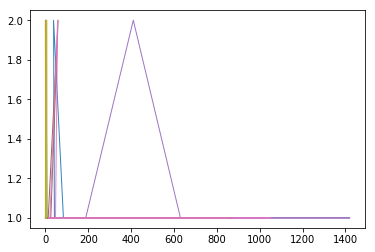

In [480]:
plt.plot(X_test,y_pred,linewidth=1, alpha=0.9,)